# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Determine business objectives

* To be able to predict used cars market value.
* To enable used car sellers to understand what is desired related to purchase of used cars, what are the important features related to cars they should be interested in when trying to market and sell.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [175]:
vehicles = pd.read_csv('data/vehicles.csv')

In [176]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

It seems the DataFrame contains 426k entries and 18 columns. Most of the fields are of object type, 2 are int64 type and 2 are of float64 type.

In [177]:
vehicles.head(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


Scanning first 20 rows revealed that data contains lots of NaN data. We need to handle it to ensure good prediction.

In [178]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Description reveals we have only 4 numeric features.

Post understanding the data and reviewing the business requirement again we came to the conclusion that our target feature for prediction should be price.

#### Plots for understanding

Lets plot some chart to understand the data bit more. Would like to plot for both numerical as well as categorical data against price to understand the relationship

#### Numerical data plotting

We should first have a look at price as it is our target variable.

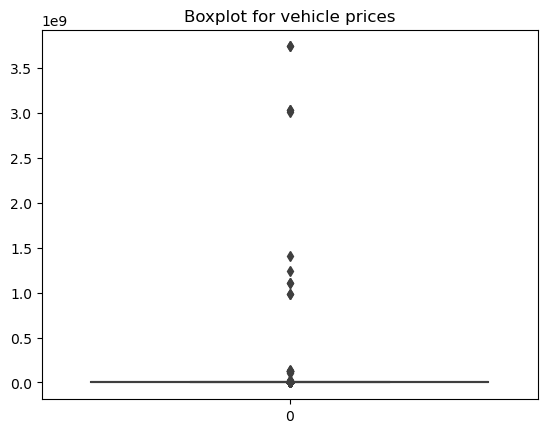

In [179]:
sns.boxplot(data = vehicles['price'])
plt.title('Boxplot for vehicle prices')
plt.savefig('images/vehicle_prices_boxplot.png')

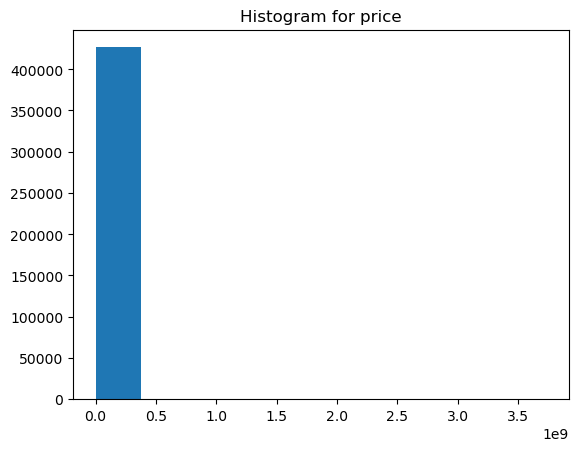

In [180]:
plt.hist(vehicles['price'])
plt.title('Histogram for price')
plt.savefig('images/used_car_price_histogram.png')

The boxplot and histogram above shows that price is not greatly distributed. This we need to consider and find a solution before proceeding with the actual analysis.

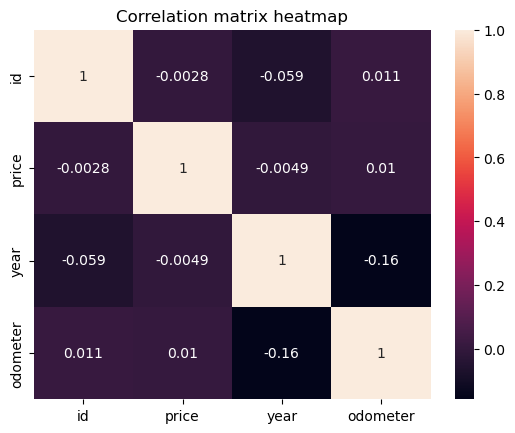

In [181]:
sns.heatmap(vehicles.corr(), annot=True)
plt.title('Correlation matrix heatmap')
plt.savefig('images/correlation_matrix_heatmap.png')

Correlation matrix agrees with our above analysis revealing that we have 4 numerical features in the data. We can ignore the id feature as it is not very useful to us. Relationship between price and odometer seems to be positive whereas with year it is negative (which kind of make sense as a car gets older, price drops accordingly). The relationship is not appearing as strong. 

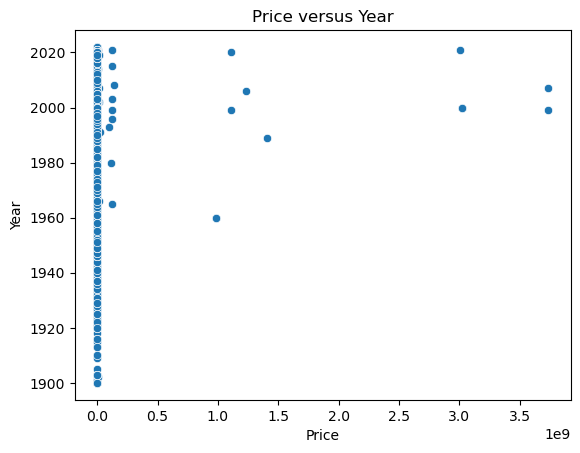

In [182]:
sns.scatterplot(data=vehicles, x="price", y="year")
plt.title('Price versus Year')
plt.xlabel('Price')
plt.ylabel('Year')
plt.savefig('images/price_vs_year_scatter.png')

The scatteplot seems to be agreeing well with our correlation matrix analysis. Price seems to be lesser for older cars and more for newer cars.

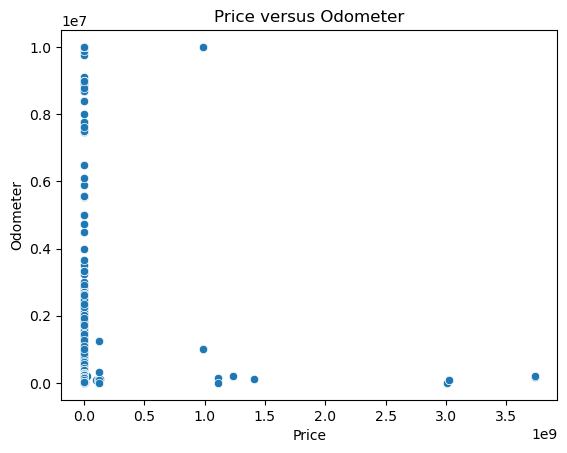

In [183]:
sns.scatterplot(data=vehicles, x="price", y="odometer")
plt.title('Price versus Odometer')
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.savefig('images/price_vs_odometer_scatter.png')

Scatterplot reveals that price is generally higher for lower odometer values.

The scatterplot doesn't look too promising too as the price is not properly distributed.

#### Categorical data plotting

Let's have a look at the categorical data now as data contains lot categorical data.

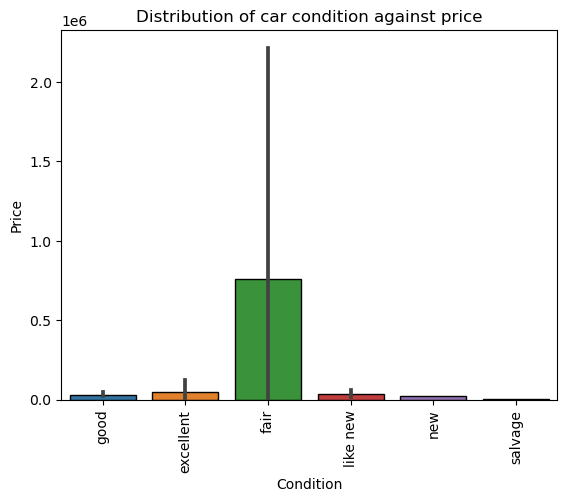

In [184]:
sns.barplot(x="condition", y="price",data=vehicles, edgecolor="black")
plt.title('Distribution of car condition against price')
# Set x-axis label
plt.xlabel('Condition')
# Set y-axis label
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.savefig('images/car_condtion_distribution.png')

It seems we have cars with fair condtion more in the data. Of course, generally as seen in real life, people prefer to sell car fair condtion as used cars than in really new or worse condition.

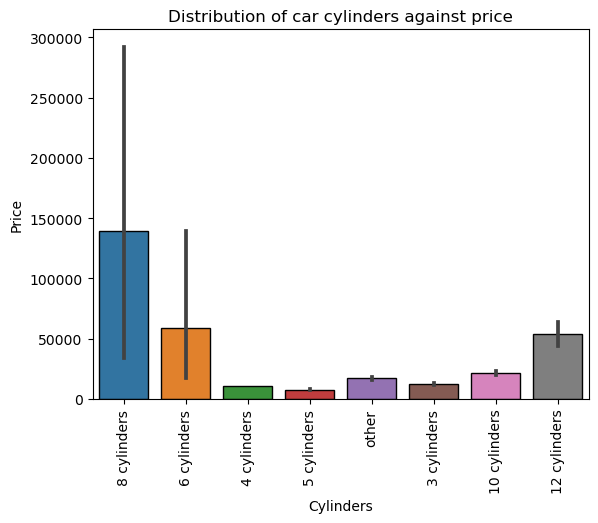

In [185]:
sns.barplot(x="cylinders", y="price",data=vehicles, edgecolor="black")
plt.title('Distribution of car cylinders against price')
# Set x-axis label
plt.xlabel('Cylinders')
# Set y-axis label
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.savefig('images/car_cylinders_distribution.png')

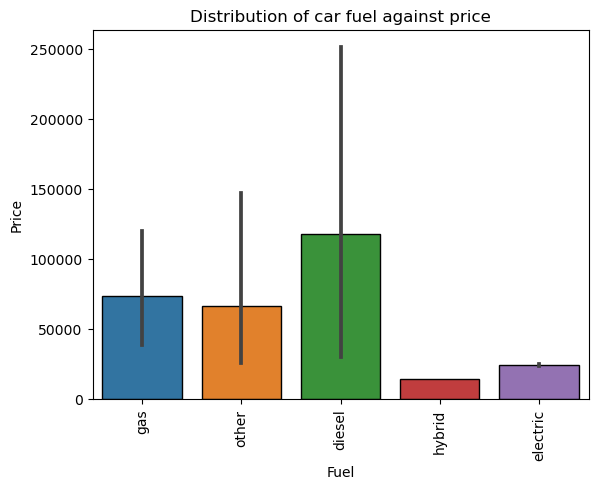

In [186]:
sns.barplot(x="fuel", y="price",data=vehicles, edgecolor="black")
plt.title('Distribution of car fuel against price')
# Set x-axis label
plt.xlabel('Fuel')
# Set y-axis label
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.savefig('images/car_fuel_distribution.png')

Plot revealing data has diesel cars are being sold highest as used cars.

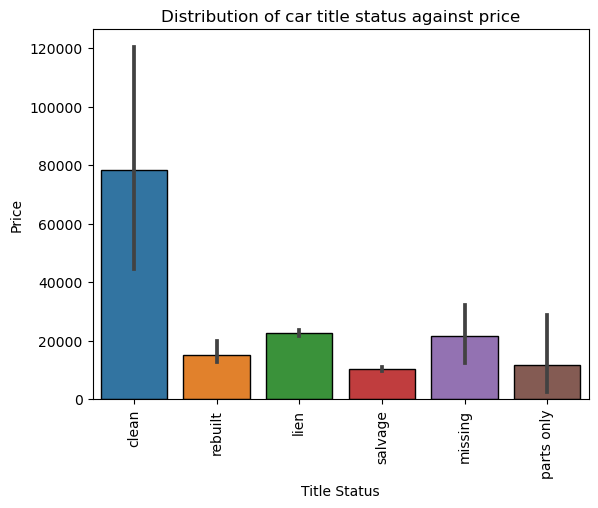

In [187]:
sns.barplot(x="title_status", y="price",data=vehicles, edgecolor="black")
plt.title('Distribution of car title status against price')
# Set x-axis label
plt.xlabel('Title Status')
# Set y-axis label
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.savefig('images/car_title_status_distribution.png')

Plot reveals clean cars are highest in data.

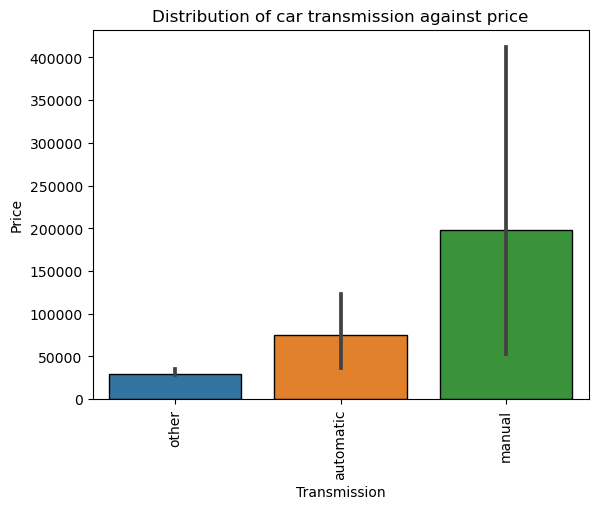

In [188]:
sns.barplot(x="transmission", y="price",data=vehicles, edgecolor="black")
plt.title('Distribution of car transmission against price')
# Set x-axis label
plt.xlabel('Transmission')
# Set y-axis label
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.savefig('images/car_transmission_distribution.png')

Interestingly manual cars are the highest to be sold as used cars.

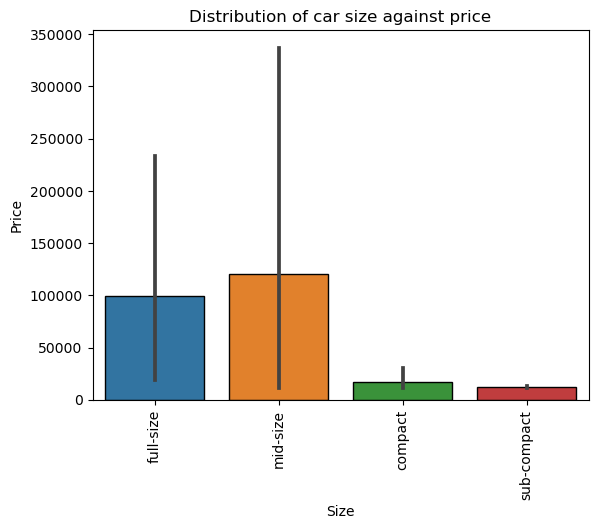

In [189]:
sns.barplot(x="size", y="price",data=vehicles, edgecolor="black")
plt.title('Distribution of car size against price')
# Set x-axis label
plt.xlabel('Size')
# Set y-axis label
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.savefig('images/car_size_distribution.png')

Interestingly mid sized cars are the highest to be sold as used cars.

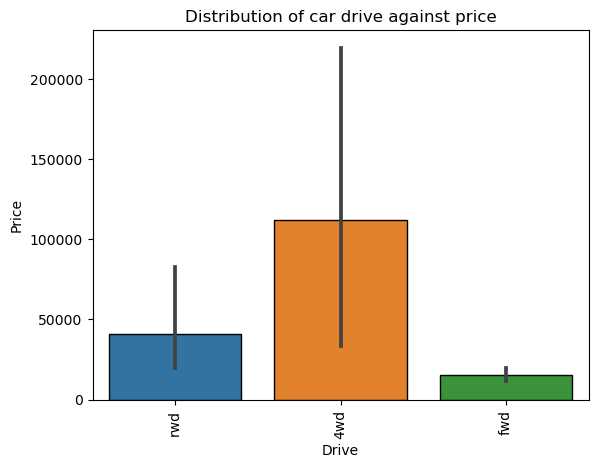

In [190]:
sns.barplot(x="drive", y="price",data=vehicles, edgecolor="black")
plt.title('Distribution of car drive against price')
# Set x-axis label
plt.xlabel('Drive')
# Set y-axis label
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.savefig('images/car_drive_distribution.png')

4wd (4 wheel drive ???) revealed to be highest number to be sold as used cars.

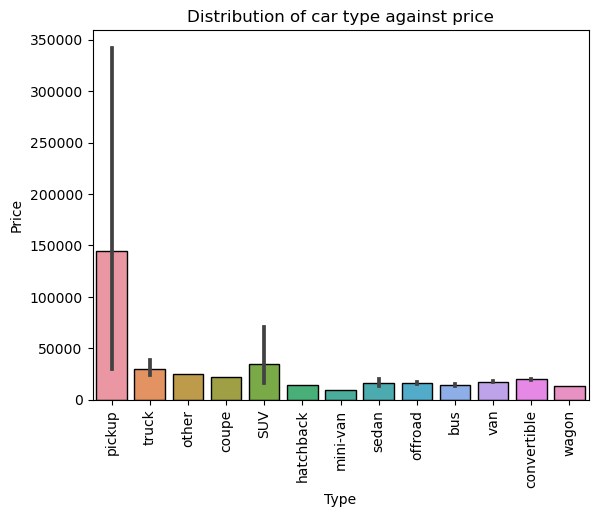

In [191]:
sns.barplot(x="type", y="price",data=vehicles, edgecolor="black")
plt.title('Distribution of car type against price')
# Set x-axis label
plt.xlabel('Type')
# Set y-axis label
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.savefig('images/car_type_distribution.png')

Pickup cars are the highest to be sold as used cars as per the data.

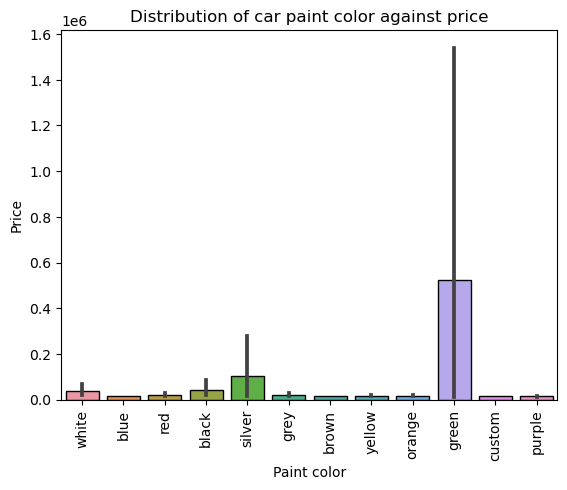

In [192]:
sns.barplot(x="paint_color", y="price",data=vehicles, edgecolor="black")
plt.title('Distribution of car paint color against price')
# Set x-axis label
plt.xlabel('Paint color')
# Set y-axis label
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.savefig('images/car_paint_color_distribution.png')

Interesting, cars sold as used are mostly of green color.

We left out the plot for region as its plot is difficult to read. Instead, we can see the value counts above to get an idea about how is the distribution.

In [193]:
print(vehicles['region'].value_counts())

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64


#### Null / NaN exploration

In [194]:
vehicles.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [195]:
def nan_percentage(vehicles, total):
    """
    Return NaN ratio for each feature
    
    Args:
     vehicles(DataFrame): Contains all the features
     total(number): Total entries
    """
    for nan_val in vehicles.isna().sum():
        print(f'ratio is {(nan_val/ total) * 100}%')

In [196]:
nan_percentage(vehicles, 426880)

ratio is 0.0%
ratio is 0.0%
ratio is 0.0%
ratio is 0.28228073463268366%
ratio is 4.133714392803598%
ratio is 1.2361787856071964%
ratio is 40.78523238380809%
ratio is 41.6224700149925%
ratio is 0.7058189655172414%
ratio is 1.0307346326836582%
ratio is 1.9307533733133435%
ratio is 0.5987631184407797%
ratio is 37.725356071964015%
ratio is 30.586347451274364%
ratio is 71.7674756371814%
ratio is 21.752717391304348%
ratio is 30.501077586206897%
ratio is 0.0%


Ok, it seems the data contains lot of NaN (highest being 306k for size feature). Planning to drop more than 30% NaN as they will not contribute lot to the analysis.

In [197]:
nan_ge_30_per = ['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color']

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [198]:
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display="diagram")
from sklearn.model_selection import GridSearchCV

#### Data Cleaning

The very first thing we should try to do is that convert NaNs into useful value so that we can run analysis properly. Data contains lot NaNs values.


As mentioned earlier, we need to fix the value of price so that it becomes predict friendly.

In [199]:
print(vehicles['price'].min())
print(vehicles['price'].max())

0
3736928711


The min and max value looks odd. Car should have a min price and max price looks way off.

In [200]:
vehicles = vehicles[(vehicles['price'] > 500 ) & (vehicles['price'] < 50000 )]

Decided an arbitary boundary to normalize price. The above min and max have been decided by referring the boxplot below. Don't see anymore outlier now and data seems to be distributing good.

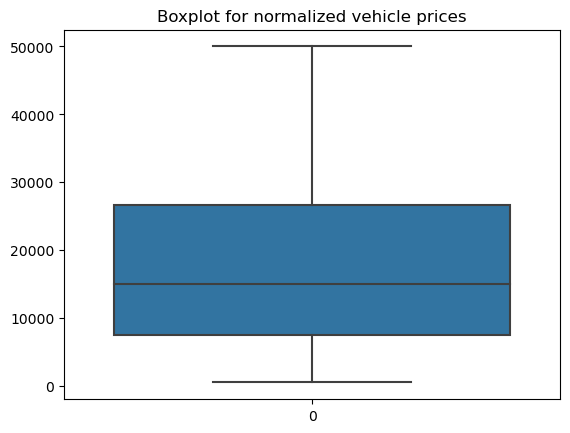

In [201]:
sns.boxplot(data = vehicles['price'])
plt.title('Boxplot for normalized vehicle prices')
plt.savefig('images/vehicle_normalized_prices_boxplot.png')

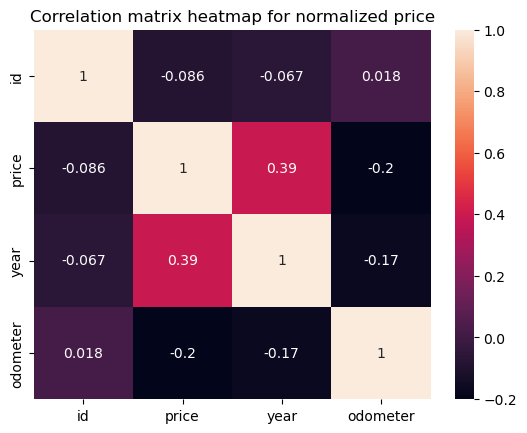

In [202]:
sns.heatmap(vehicles.corr(), annot=True)
plt.title('Correlation matrix heatmap for normalized price')
plt.savefig('images/correlation_matrix_normalized_heatmap.png')

As we can see in the above correlation matrix heatmap, the relationship between price and odometer has improved alot.

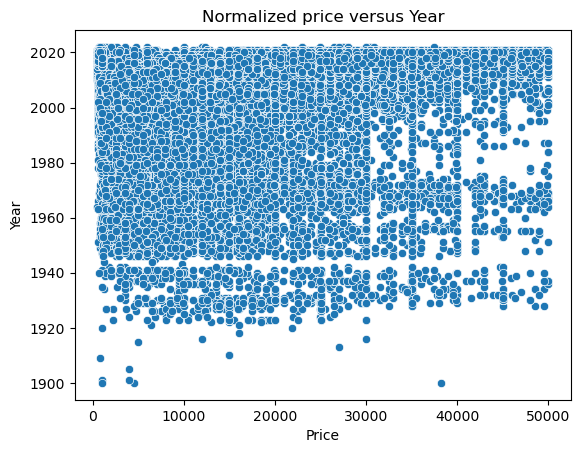

In [203]:
sns.scatterplot(data=vehicles, x="price", y="year")
plt.title('Normalized price versus Year')
plt.xlabel('Price')
plt.ylabel('Year')
plt.savefig('images/normalized_price_vs_year_scatter.png')

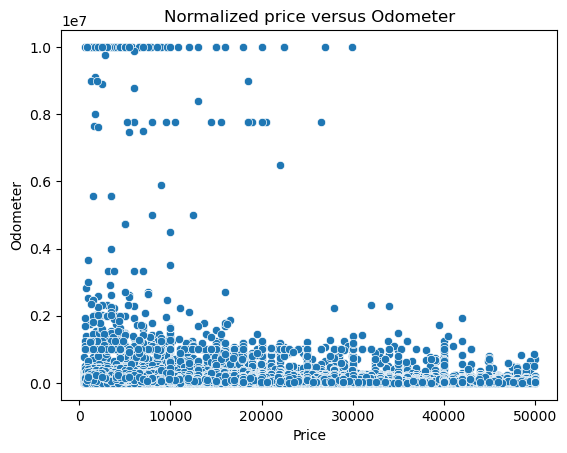

In [204]:
sns.scatterplot(data=vehicles, x="price", y="odometer")
plt.title('Normalized price versus Odometer')
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.savefig('images/normalized_price_vs_odometer_scatter.png')

The above scatterplots with normalized price looks way better than the previous plots.

Next, we take care of NaN features.

In [205]:
def print_nan_uniques(features):
    """
    Prints uniques for all NaN features of the dataframe.
    
    Args:
     features(List): List of features
    
    Returns:
     prints all uniques
    """
    for feature in features:
        print(vehicles[feature].unique())
        print(vehicles[feature].unique().size)
        print(" ")
        print("************************************************")
        print(" ")

In [206]:
print_nan_uniques([
                   'region',
                   'year', 
                   'manufacturer', 
                   'model',
                   'fuel',
                   'odometer',
                   'title_status',
                   'transmission',
                   'type',
                   'state'])

['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'bellingham'
 'skagit / island / SJI' 'auburn' 'birmingham' 'dothan'
 'florence / muscle shoals' 'gadsden-anniston' 'huntsville / decatur'
 'mobile' 'montgomery' 'tuscaloosa' 'anchorage / mat-su' 'fairbanks'
 'kenai peninsula' 'southeast alaska' 'flagstaff / sedona' 'mohave county'
 'phoenix' 'show low' 'sierra vista' 'tucson' 'yuma' 'fort smith'
 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort 

In [207]:
vehicles_cleaned= vehicles.drop(columns=nan_ge_30_per, axis=1)

Dropped all targetted NaN

In [208]:
vehicles_cleaned= vehicles_cleaned.drop(columns=['id'], axis=1)

Dropped id field too as it is not very useful

We can now use above data to guess and perform simple NaN replacement for our data

In [209]:
def convert_nan_to_value(vehicles, features):
    """
    Converts NaN to proper values for features.
    
    Args:      
     features(List): List of features
     vehicles(DataFrame): The dataframe
    
    Returns:
     vehicles(DataFrame)
    """
    for feature in features:
        if feature == 'region':
            vehicles['region'] = vehicles['region'].fillna('other')
        elif feature == 'year':
            vehicles['year'] = vehicles['year'].fillna(int(vehicles['year'].median()))
        elif feature == 'manufacturer':
            vehicles['manufacturer'] = vehicles['manufacturer'].fillna('NA')
        elif feature == 'model':
            vehicles['model'] = vehicles['model'].fillna('NA')
        elif feature == 'fuel':
            vehicles['fuel'] = vehicles['fuel'].fillna('other')
        elif feature == 'odometer':
            vehicles['odometer'] = vehicles['odometer'].fillna(int(vehicles['odometer'].median()))
        elif feature == 'title_status':
            vehicles['title_status'] = vehicles['title_status'].fillna('other')
        elif feature == 'transmission':
            vehicles['transmission'] = vehicles['transmission'].fillna('other')
        elif feature == 'type':
            vehicles['type'] = vehicles['type'].fillna('other')
        elif feature == 'state':
            vehicles['state'] = vehicles['state'].fillna('NA')     
    return vehicles

In [210]:
vehicles_cleaned = convert_nan_to_value(vehicles_cleaned, [
                   'region',  
                   'year', 
                   'manufacturer', 
                   'model',
                   'fuel',
                   'odometer',
                   'title_status',
                   'transmission',
                   'type',
                   'state'])

In [211]:
vehicles_cleaned.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64

No more null data for vehicles

In [212]:
vehicles_cleaned['year'] = vehicles_cleaned['year'].astype(int)

In [213]:
vehicles_cleaned['odometer'] = vehicles_cleaned['odometer'].astype(int)

Converted year and odometer to integers as this datatype makes more sense for these data.

In [214]:
vehicles_cleaned.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,prescott,6000,2013,NA,NA,other,90076,other,other,other,az
1,fayetteville,11900,2013,NA,NA,other,90076,other,other,other,ar
2,florida keys,21000,2013,NA,NA,other,90076,other,other,other,fl
3,worcester / central MA,1500,2013,NA,NA,other,90076,other,other,other,ma
4,greensboro,4900,2013,NA,NA,other,90076,other,other,other,nc


Data looks much better now with no NaN values and filled up with logical values.

In [215]:
vehicles_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370724 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        370724 non-null  object
 1   price         370724 non-null  int64 
 2   year          370724 non-null  int64 
 3   manufacturer  370724 non-null  object
 4   model         370724 non-null  object
 5   fuel          370724 non-null  object
 6   odometer      370724 non-null  int64 
 7   title_status  370724 non-null  object
 8   transmission  370724 non-null  object
 9   type          370724 non-null  object
 10  state         370724 non-null  object
dtypes: int64(3), object(8)
memory usage: 42.0+ MB


Having a look at the features post cleanup

#### Feature engineering

Time for feature engineering where we are planning to perform train/test split, build preprocessor for categorical data, determine scaling for the data and figure out way how we are going to create models.

In [216]:
# y is our target variable
y = vehicles_cleaned['price']

In [217]:
y.head()

0     6000
1    11900
2    21000
3     1500
4     4900
Name: price, dtype: int64

Inspecting y (target feature, i.e, price)

In [218]:
# X contains independent features based on which we are going
# to predict price
X = vehicles_cleaned.drop(columns=['price'], axis=1)

In [219]:
X.head()

,region,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,prescott,2013,NA,NA,other,90076,other,other,other,az
1,fayetteville,2013,NA,NA,other,90076,other,other,other,ar
2,florida keys,2013,NA,NA,other,90076,other,other,other,fl
3,worcester / central MA,2013,NA,NA,other,90076,other,other,other,ma
4,greensboro,2013,NA,NA,other,90076,other,other,other,nc


Inspecting X (independent features which will be used to predict y)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
X_train.head()

,region,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
348423,greenville / upstate,2015,volkswagen,eos komfort,gas,43470,clean,automatic,convertible,sc
234524,charlotte,2002,ford,f-250 4x4,gas,129000,clean,automatic,truck,nc
248747,las vegas,2013,ram,1500 regular cab,gas,88756,clean,automatic,pickup,nv
207106,muskegon,2017,jeep,wrangler sport suv 2d,gas,22947,clean,other,other,mi
214906,minneapolis / st paul,2018,mercedes-benz,gla 250 4matic,gas,21368,clean,other,other,mn


Performing train/test split where training contains 70% AND test contains 30% data. Random state has been selected as 42 for shuffling.

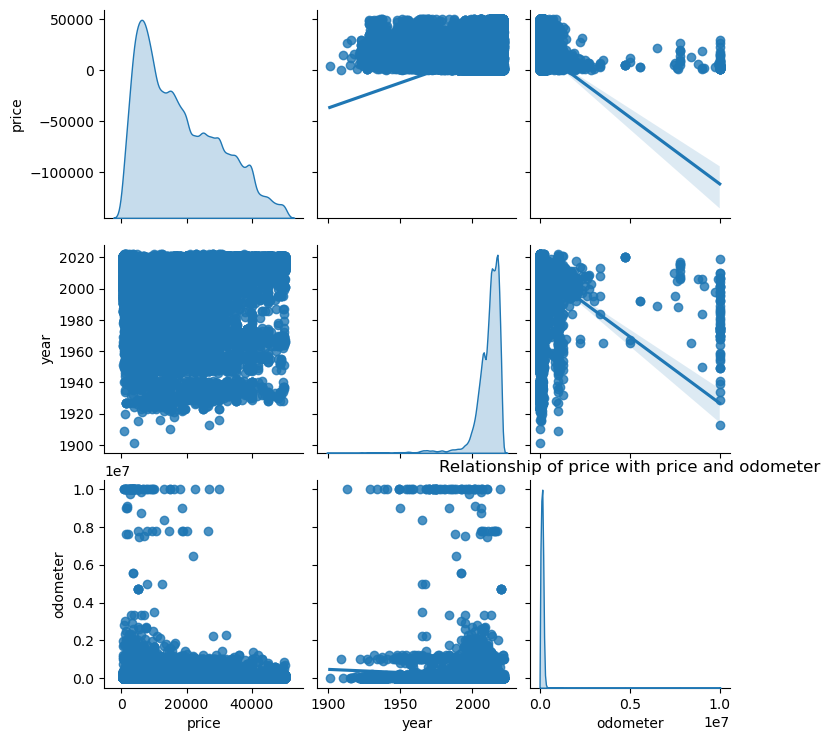

In [120]:
train_dataset = X_train.copy()
train_dataset.insert(0, "price",  y_train)
sns.pairplot(train_dataset, kind="reg", diag_kind="kde")
plt.title('Relationship of price with price and odometer')
plt.savefig('images/car_pairplot.png')

Pairplot of training data again represents the previously revealed relationship between numerical features against price.

In [121]:
categorical_columns = [
                   'region',
                   'manufacturer', 
                   'model',
                   'fuel',
                   'title_status',
                   'transmission',
                   'type',
                   'state']
numerical_columns = ["year", "odometer"]

Split the columns in categorical and numerical so that we can transform them accordingly

In [122]:
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

Built a preprocesor which will transform categorical_columns using OneHotEncoding. 

In [123]:
scaler = StandardScaler()

We will use Standard scaler to transform and normalize data.

In [124]:
def log_transform(model):
    """
     Perfom regression on transformed target.

     Args:
      model(Regression Model): The model which we are using for prediction
      
     Returns:
      TransformedTargetRegressor
    """
    return TransformedTargetRegressor(regressor=model, func=np.log1p, inverse_func=np.expm1)

Above method is to be used for transformation of target and building model using transformed target. We use logarithm (log1p) to transform y.

In [125]:
def build_model_pipeline(preprocessor, regressor, with_log_transform = False):
    """
    Build model pipeline with or without target transformation
    
    Args:
     preprocessor(ColumnTransformer):    
    """
    regressor = log_transform(regressor) if with_log_transform else regressor
    return Pipeline([('preprocessor', preprocessor),('regressor', regressor)])
    

Finally, we will use above method to build models

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

We would like to try out Linear and Ridge regression for our modeling as those makes more sense (Cause currently we are aware of these 2 regression models which are popular and heavily used)

#### Linear regression without target transformation

In [126]:
lreg_without_transform_model =  build_model_pipeline(preprocessor, 
                                                     GridSearchCV(estimator = LinearRegression(), 
                                                                  param_grid = {'fit_intercept': [True]}, 
                                                                  cv=10,
                                                                 scoring = 'r2'), 
                                                     False)

We are using GridSearchCV with Linear regression and cross_validation = 10 (which is implemented via KFold cv under the hood). The pipeline is built with linear regression without target transformation

In [127]:
lreg_without_transform_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])],
                                   verbose_feature_names_out=False)),
                ('regressor',
                 GridSearchCV(cv=10, estimator=LinearRegression(),
                              param_grid={'fit_intercept': [True]},
                              scoring='r2'))])

Fit the model

In [128]:
print(f"Best average cross-validated score {lreg_without_transform_model.named_steps['regressor'].best_score_}")

Best average cross-validated score 0.3542371567440509


In [134]:
linear_reg_without_transform_train_mse = mean_squared_error(y_train, lreg_without_transform_model.predict(X_train), squared=True)
print(f'Mean Squared error for training data is {linear_reg_without_transform_train_mse}')
linear_reg_without_transform_train_mse = mean_squared_error(y_train, lreg_without_transform_model.predict(X_train), squared=False)
print(f'RMSE for training data is {linear_reg_without_transform_train_mse}')
linear_reg_without_transform_test_mse = mean_squared_error(y_test, lreg_without_transform_model.predict(X_test), squared=True)
print(f'Mean Squared error for test data is {linear_reg_without_transform_test_mse}')
linear_reg_without_transform_test_mse = mean_squared_error(y_test, lreg_without_transform_model.predict(X_test), squared=False)
print(f'RMSE for test data is {linear_reg_without_transform_test_mse}')

Mean Squared error for training data is 93098769.58888525
RMSE for training data is 9648.77036667809
Mean Squared error for test data is 92643085.18655641
RMSE for test data is 9625.127801050561


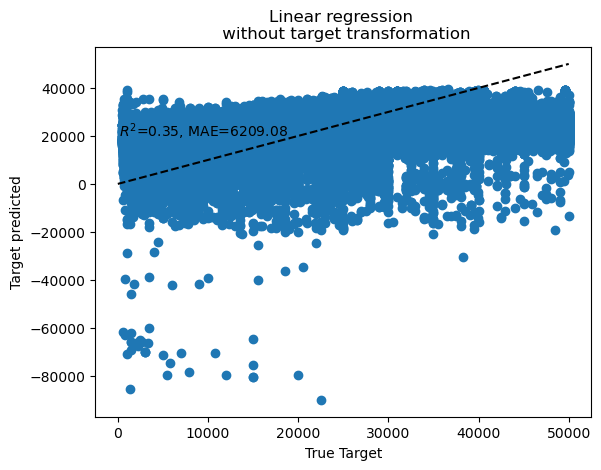

In [240]:
plt.scatter(y_test, lreg_without_transform_model.predict(X_test))
plt.title('Linear regression \n without target transformation')
plt.xlabel('True Target')
plt.ylabel('Target predicted')
plt.plot([0, 50000], [0, 50000], '--k')
plt.text(100, 20000, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, lreg_without_transform_model.predict(X_test)), median_absolute_error(y_test, lreg_without_transform_model.predict(X_test))))
plt.savefig('images/lin_reg1_r2_scatter.png')

#### Linear regression with target transformation

In [135]:
lreg_with_transform_model =  build_model_pipeline(preprocessor, 
                                                     GridSearchCV(LinearRegression(), {'fit_intercept': [True]}, cv=10), 
                                                     True)

We are using GridSearchCV with Linear regression and cross_validation = 10 (which is implemented via KFold cv under the hood). The pipeline is built with linear regression with target transformation

In [136]:
lreg_with_transform_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])],
                                   verbose_feature_names_out=False)),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=GridSearchCV(cv=10,
                                                                   estimator=LinearRegression(),
                                                                   param_grid={'fit_intercept': [True]})))])

Fit the model

In [137]:
print(f"Best average cross-validated score {lreg_with_transform_model.named_steps['regressor'].regressor_.best_score_}")

Best average cross-validated score 0.2657897368922826


In [138]:
linear_reg_with_transform_train_mse = mean_squared_error(y_train, lreg_with_transform_model.predict(X_train), squared= True)
print(f'Mean Squared error for training data is {linear_reg_with_transform_train_mse}')
linear_reg_with_transform_train_mse = mean_squared_error(y_train, lreg_with_transform_model.predict(X_train), squared= False)
print(f'RMSE for training data is {linear_reg_with_transform_train_mse}')
linear_reg_with_transform_test_mse = mean_squared_error(y_test, lreg_with_transform_model.predict(X_test), squared= True)
print(f'Mean Squared error for test data is {linear_reg_with_transform_test_mse}')
linear_reg_with_transform_test_mse = mean_squared_error(y_test, lreg_with_transform_model.predict(X_test), squared= False)
print(f'RMSE for test data is {linear_reg_with_transform_test_mse}')

Mean Squared error for training data is 123137140.21772508
RMSE for training data is 11096.717542486385
Mean Squared error for test data is 122078507.81838985
RMSE for test data is 11048.914327588473


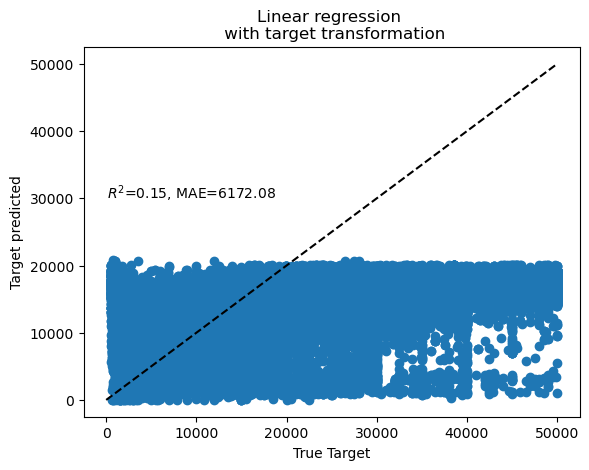

In [241]:
plt.scatter(y_test, lreg_with_transform_model.predict(X_test))
plt.title('Linear regression \n with target transformation')
plt.xlabel('True Target')
plt.ylabel('Target predicted')
plt.plot([0, 50000], [0, 50000], '--k')
plt.text(100, 30000, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, lreg_with_transform_model.predict(X_test)), median_absolute_error(y_test, lreg_with_transform_model.predict(X_test))))
plt.savefig('images/lin_reg2_r2_scatter.png')

#### Ridge regression without transformation

In [139]:
ridge_without_transform_model =  build_model_pipeline(preprocessor, 
                                                     GridSearchCV(Ridge(), {'alpha': [0.1, 1.0, 10.0]}, cv=10), 
                                                     False)

We are using GridSearchCV with Ridge regression without target transformation and with alpha values of [0.1, 1.0, 10.0] and cross_validation = 10 (which is implemented via KFold cv under the hood).

In [140]:
ridge_without_transform_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])],
                                   verbose_feature_names_out=False)),
                ('regressor',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [0.1, 1.0, 10.0]}))])

Fit the model

In [164]:
print(f"Best cross-validated params {ridge_without_transform_model.named_steps['regressor'].best_params_}")

Best cross-validated params {'alpha': 10.0}


In [168]:
print(f"Best average cross-validated score {ridge_without_transform_model.named_steps['regressor'].best_score_}")

Best average cross-validated score 0.040655460035308545


In [142]:
ridge_without_transform_train_mse = mean_squared_error(y_train, ridge_without_transform_model.predict(X_train), squared= True)
print(f'Mean Squared error for training data is {ridge_without_transform_train_mse}')
ridge_without_transform_train_mse = mean_squared_error(y_train, ridge_without_transform_model.predict(X_train), squared= False)
print(f'RMSE for training data is {ridge_without_transform_train_mse}')
ridge_without_transform_test_mse = mean_squared_error(y_test, ridge_without_transform_model.predict(X_test), squared= True)
print(f'Mean Squared error for test data is {ridge_without_transform_test_mse}')
ridge_without_transform_test_mse = mean_squared_error(y_test, ridge_without_transform_model.predict(X_test), squared= False)
print(f'RMSE for test data is {ridge_without_transform_test_mse}')

Mean Squared error for training data is 138289427.2210655
RMSE for training data is 11759.652512768627
Mean Squared error for test data is 138181069.5640345
RMSE for test data is 11755.044430542766


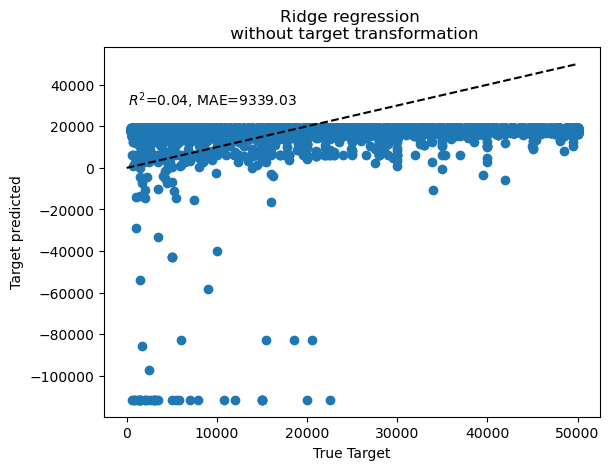

In [242]:
plt.scatter(y_test, ridge_without_transform_model.predict(X_test))
plt.title('Ridge regression \n without target transformation')
plt.xlabel('True Target')
plt.ylabel('Target predicted')
plt.plot([0, 50000], [0, 50000], '--k')
plt.text(100, 30000, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, ridge_without_transform_model.predict(X_test)), median_absolute_error(y_test, ridge_without_transform_model.predict(X_test))))
plt.savefig('images/ridge1_r2_scatter.png')

#### Ridge regression with transformation

In [143]:
ridge_with_transform_model =  build_model_pipeline(preprocessor, 
                                                     GridSearchCV(Ridge(), {'alpha': [0.1, 1.0, 10.0]}, cv=10), 
                                                     True)

We are using GridSearchCV with Ridge regression with target transformation and with alpha values of [0.1, 1.0, 10.0] and cross_validation = 10 (which is implemented via KFold cv under the hood).

In [144]:
ridge_with_transform_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])],
                                   verbose_feature_names_out=False)),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=GridSearchCV(cv=10,
                                                                   estimator=Ridge(),
                                                                   param_grid={'alpha': [0.1,
                                                                                         1.0,
                                                                                         10.0]})))])

Fit the model

In [165]:
print(f"Best cross-validated params {ridge_with_transform_model.named_steps['regressor'].regressor_.best_params_}")

Best cross-validated params {'alpha': 10.0}


In [170]:
print(f"Best average cross-validated score {ridge_with_transform_model.named_steps['regressor'].regressor_.best_score_}")

Best average cross-validated score 0.04238976569490212


In [148]:
ridge_with_transform_train_mse = mean_squared_error(y_train, ridge_with_transform_model.predict(X_train), squared=True)
print(f'Mean Squared error for training data is {ridge_with_transform_train_mse}')
ridge_with_transform_train_mse = mean_squared_error(y_train, ridge_with_transform_model.predict(X_train), squared=False)
print(f'RMSE for training data is {ridge_with_transform_train_mse}')
ridge_with_transform_test_mse = mean_squared_error(y_test, ridge_with_transform_model.predict(X_test), squared=True)
print(f'Mean Squared error for test data is {ridge_with_transform_test_mse}')
ridge_with_transform_test_mse = mean_squared_error(y_test, ridge_with_transform_model.predict(X_test), squared=False)
print(f'RMSE for test data is {ridge_with_transform_test_mse}')

Mean Squared error for training data is 154387166.5095192
RMSE for training data is 12425.263237031206
Mean Squared error for test data is 153351263.58837143
RMSE for test data is 12383.507725534451


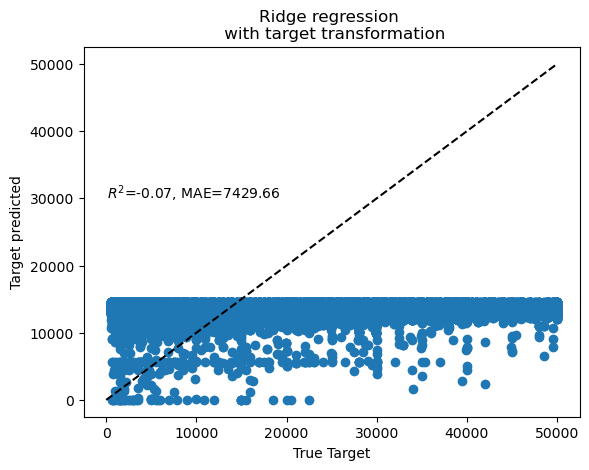

In [243]:
plt.scatter(y_test, ridge_with_transform_model.predict(X_test))
plt.title('Ridge regression \n with target transformation')
plt.xlabel('True Target')
plt.ylabel('Target predicted')
plt.plot([0, 50000], [0, 50000], '--k')
plt.text(100, 30000, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, ridge_with_transform_model.predict(X_test)), median_absolute_error(y_test, ridge_with_transform_model.predict(X_test))))
plt.savefig('images/ridge2_r2_scatter.png')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

We have already calculated and plotted the r2 in the above plots. Below we are printing again for summary and for the sake of comparision

In [149]:
print(f'R2 score for the linear regression without transformation is {r2_score(y_test, lreg_without_transform_model.predict(X_test))}')

R2 score for the linear regression without transformation is 0.3545574735565693


In [150]:
print(f'R2 score for the linear regression with transformation is {r2_score(y_test, lreg_with_transform_model.predict(X_test))}')

R2 score for the linear regression with transformation is 0.1494814712606347


In [151]:
print(f'R2 score for the ridge regression without transformation is {r2_score(y_test, ridge_without_transform_model.predict(X_test))}')

R2 score for the ridge regression without transformation is 0.03729524479385449


In [152]:
print(f'R2 score for the ridge regression with transformation is {r2_score(y_test, ridge_with_transform_model.predict(X_test))}')

R2 score for the ridge regression with transformation is -0.06839519435751695


So, we used 4 models (Linear Regression and Ridge with and without target transformation). The best performaing model seems to be Linear Regression with target transformation with r2 score.

Lets now try to plot regplot to see how the predicted stands up with respect to actual.

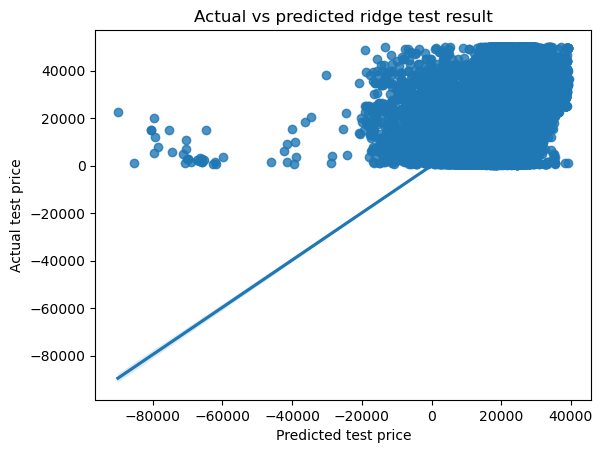

In [157]:
sns.regplot(y = y_test, x= lreg_without_transform_model.predict(X_test), data = X_test)
plt.title('Actual vs predicted ridge test result')
plt.xlabel('Predicted test price')
plt.ylabel('Actual test price')
plt.savefig('images/actual_predicted_regplot.png')

In [158]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    lreg_without_transform_model, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {X_test.columns[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    year    0.213 +/- 0.002
    transmission0.130 +/- 0.001
    type    0.075 +/- 0.001
    fuel    0.048 +/- 0.001
    odometer0.025 +/- 0.001
    manufacturer0.020 +/- 0.000
    title_status0.003 +/- 0.000
    model   0.003 +/- 0.000
    state   0.003 +/- 0.000
    region  0.001 +/- 0.000
neg_mean_absolute_percentage_error
    year    0.222 +/- 0.001
    transmission0.128 +/- 0.002
    type    0.049 +/- 0.001
    fuel    0.045 +/- 0.001
    odometer0.025 +/- 0.000
    manufacturer0.013 +/- 0.000
    title_status0.003 +/- 0.000
    model   0.002 +/- 0.000
    state   0.002 +/- 0.000
    region  0.001 +/- 0.000
neg_mean_squared_error
    year    30541063.177 +/- 257468.064
    transmission18610442.884 +/- 181180.196
    type    10779223.484 +/- 117790.401
    fuel    6902920.843 +/- 111462.074
    odometer3649504.084 +/- 78981.773
    manufacturer2863231.260 +/- 43372.467
    title_status410601.850 +/- 15641.989
    model   379013.229 +/- 5279.188
    state   377883.429 +/- 7971.251

#### Findings

So, the best r2 score we got for our best performing model (Linear Regression without target transformation) came out to be 0.35. Then, permutiation feature importance revealed following 3 features to be mostly impacting the prediction for price of used car:
* Year
* Transmission
* Type

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

As we discussed the questions as part of the business objectives, we can answer them as below:

Q: How can we predict used cars market value?


Ans: We can now predict a car's price given following attributes:
* region  
* year
* manufacturer
* model
* fuel
* odometer
* title_status
* transmission
* type
* state

Q: Which features car sellers should be interested in to market and sell better?

Ans: Car sellers should be interested in based on our analysis:
* Year of the car.
* Transmission type of the car.
* Type of the car.

Additionally, we can wrap this prediction model into an API and can integrate this in any app/website which car dealers would like to use and provide to end users as well.